# Intro to Regression

We're going through a few regression exercises that will help you see how regression works in Python.  

## Objectives: 
At the end of this notebook the students should:
- Be able to visualize data
- Look for correlations and multicollinearity
- Understand how linear regression models work
- Interpret basic regression statistics like R^2
- Do basic feature engineering and selection to improve models


Be able to create linear regression in:
- [***statsmodels***](http://statsmodels.sourceforge.net/): a package mainly best at doing regressions with traditional R formula syntax
- [***scikit-learn***](http://scikit-learn.org/dev/index.html): This is the main machine learning package we'll be using throughout the course.  It has a multitude of machine learning algorithms and helpful machine learning pipeline tools.  sklearn has a tremendous amount of functionality, to get the most out of this course it will help to really explore the depth of the documentation on your own and watch as you understand more and more of the functionality as the course progresses.


Gain familiarity with the following:
- ***R formulas***: R formulas are a convenient way for encapsulating functional relationships for regressions
- [***seaborn***](http://stanford.edu/~mwaskom/software/seaborn/): We'll use seaborn for **visualization** as we go along
- [***Variable Preprocessing and Polynomial Regression***](http://scikit-learn.org/dev/modules/preprocessing.html#preprocessing) with scikit-learn:  We'll be **"standardizing"** many of our variables to yield better model data.  We'll show how the "linear" models can be extended to basically any type of function by using functions of the different fields as the inputs to the linear model.

## Data
We'll take a look at: [Car price predictor dataset](https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset)

# Setup
Try running the following imports and check that they all import successfully.  If they do not, install commands are given below. If necessary, at a command line window use `pip` to install the ones that are failing for you and then retry the imports.

In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

## Installations (if necessary)

```` bash
conda install pandas numpy statsmodels seaborn scikit-learn
````

# Used Car Data
We will be working with US Used Car price data to demonstrate a few basic features of ***statsmodels*** and ***seaborn*** and how they might be used in a data science workflow for regression.

The dataset includes numerous predictive features we can use to predict Used car prices.

Let's load the dataset in using ***pandas*** and take a look at it.  Here we use [***pandas.read_table***](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) to load the data.

In [2]:
import datetime as dt
pd.options.display.max_columns = 500

In [4]:
# Load data   #OPEN : update to /data / 
df = pd.read_csv('2020_used_cars.csv')
# drop retained index
df.drop(df.filter(regex="Unname"),axis=1, inplace=True)
# Take a look at the datatypes
df.describe()

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_9245/1487334525.py:2: DtypeWarning: Columns (4,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2020_used_cars.csv')


,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,is_certified,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
count,1.159806e+06,0.0,1.349822e+06,1.285580e+06,1.159806e+06,1.285580e+06,0.0,1.349822e+06,1.349822e+06,1.349822e+06,1.236827e+06,80228.000000,1.349822e+06,1.349822e+06,1.337808e+06,1.349821e+06,0.0,1349822.0
mean,2.342415e+01,NaN,9.398257e+01,2.886708e+03,2.986534e+01,2.515379e+02,NaN,3.672524e+01,2.741936e+08,-9.082682e+01,9.585190e+02,1.016740,3.726916e+04,9.471036e+01,4.254584e+00,2.080253e+05,NaN,2020.0
std,8.961661e+00,NaN,9.756131e+01,1.390980e+03,7.692250e+00,9.333536e+01,NaN,5.046573e+00,7.577099e+06,1.378741e+01,6.340475e+03,0.129841,1.768516e+04,5.567428e+02,5.063009e-01,1.310864e+05,NaN,0.0
min,9.000000e+00,NaN,0.000000e+00,7.000000e+02,1.500000e+01,7.800000e+01,NaN,1.839880e+01,2.327754e+08,-1.579020e+02,0.000000e+00,1.000000,3.869000e+02,0.000000e+00,1.000000e+00,4.159300e+04,NaN,2020.0
25%,1.800000e+01,NaN,2.100000e+01,2.000000e+03,2.500000e+01,1.750000e+02,NaN,3.316940e+01,2.698901e+08,-9.716050e+01,2.000000e+00,1.000000,2.543500e+04,0.000000e+00,4.000000e+00,5.954100e+04,NaN,2020.0
50%,2.200000e+01,NaN,5.100000e+01,2.500000e+03,2.900000e+01,2.450000e+02,NaN,3.732320e+01,2.771269e+08,-8.764440e+01,6.000000e+00,1.000000,3.352500e+04,0.000000e+00,4.333333e+00,2.758740e+05,NaN,2020.0
75%,2.600000e+01,NaN,1.620000e+02,3.500000e+03,3.300000e+01,3.100000e+02,NaN,4.089280e+01,2.799078e+08,-8.085220e+01,1.200000e+01,1.000000,4.521700e+04,0.000000e+00,4.583333e+00,3.067980e+05,NaN,2020.0
max,1.270000e+02,NaN,5.680000e+02,7.300000e+03,1.270000e+02,7.970000e+02,NaN,4.892370e+01,2.820191e+08,-6.607850e+01,4.290461e+06,4.000000,2.250000e+06,5.167900e+04,5.000000e+00,4.406550e+05,NaN,2020.0


### 1 ) Drop object columns, 'id'  column (for now) 


In [6]:
## Let's start off by only using numerical vals 
num_cols=df.dtypes[df.dtypes!='object'].index
df_num=df[num_cols]

for i in df_num.columns:
    print(i)

city_fuel_economy
combine_fuel_economy
daysonmarket
engine_displacement
franchise_dealer
highway_fuel_economy
horsepower
is_certified
is_new
latitude
listing_id
longitude
mileage
owner_count
price
savings_amount
seller_rating
sp_id
vehicle_damage_category
year


In [7]:
#let's remove ids, availability, license, 

no_ids=[c for c in df_num.columns if 'id' not in c and 'combine_fuel_economy' not in c and 'is_certified' not in c and 'vehicle_damage_category' not in c and 'year' not in c]

df_num=df_num[no_ids]


In [8]:
df_num=df_num[df_num.price.notna()]

In [9]:
# How many rows and columns does the dataset have?
df_num.shape

(1349822, 14)

In [10]:
pd.set_option('display.max_columns', 500)

df_num.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating
count,1.159806e+06,1.349822e+06,1.285580e+06,1.159806e+06,1.285580e+06,1.349822e+06,1.349822e+06,1.236827e+06,80228.000000,1.349822e+06,1.349822e+06,1.337808e+06
mean,2.342415e+01,9.398257e+01,2.886708e+03,2.986534e+01,2.515379e+02,3.672524e+01,-9.082682e+01,9.585190e+02,1.016740,3.726916e+04,9.471036e+01,4.254584e+00
std,8.961661e+00,9.756131e+01,1.390980e+03,7.692250e+00,9.333536e+01,5.046573e+00,1.378741e+01,6.340475e+03,0.129841,1.768516e+04,5.567428e+02,5.063009e-01
min,9.000000e+00,0.000000e+00,7.000000e+02,1.500000e+01,7.800000e+01,1.839880e+01,-1.579020e+02,0.000000e+00,1.000000,3.869000e+02,0.000000e+00,1.000000e+00
25%,1.800000e+01,2.100000e+01,2.000000e+03,2.500000e+01,1.750000e+02,3.316940e+01,-9.716050e+01,2.000000e+00,1.000000,2.543500e+04,0.000000e+00,4.000000e+00
50%,2.200000e+01,5.100000e+01,2.500000e+03,2.900000e+01,2.450000e+02,3.732320e+01,-8.764440e+01,6.000000e+00,1.000000,3.352500e+04,0.000000e+00,4.333333e+00
75%,2.600000e+01,1.620000e+02,3.500000e+03,3.300000e+01,3.100000e+02,4.089280e+01,-8.085220e+01,1.200000e+01,1.000000,4.521700e+04,0.000000e+00,4.583333e+00
max,1.270000e+02,5.680000e+02,7.300000e+03,1.270000e+02,7.970000e+02,4.892370e+01,-6.607850e+01,4.290461e+06,4.000000,2.250000e+06,5.167900e+04,5.000000e+00


### Visualizing with Seaborn
We see that the data has 30 responses with 7 fields (6 independent, 1 dependent) each.  Let's use pandas to check out the correlations between the different variables.

In [11]:
# View the correlations
df_num.corr()

,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating
city_fuel_economy,1.000000,0.010163,-0.638816,0.014085,0.942913,-0.684978,0.036472,-0.014486,-0.083361,-0.023259,0.004789,-0.300556,-0.042522,-0.038492
daysonmarket,0.010163,1.000000,-0.110061,0.077194,0.009475,-0.079778,0.105825,0.036857,0.020933,-0.052710,0.008936,-0.000657,-0.060339,0.000525
engine_displacement,-0.638816,-0.110061,1.000000,-0.010337,-0.650728,0.841918,-0.015017,-0.026385,-0.011322,0.017731,0.000878,0.537696,0.036003,0.019275
franchise_dealer,0.014085,0.077194,-0.010337,1.000000,0.008045,-0.004726,0.466855,0.030993,0.008290,-0.275000,-0.001120,0.033418,-0.254595,0.020650
highway_fuel_economy,0.942913,0.009475,-0.650728,0.008045,1.000000,-0.718034,0.024970,-0.046200,-0.085414,-0.017833,0.005250,-0.385798,-0.041520,-0.054613
horsepower,-0.684978,-0.079778,0.841918,-0.004726,-0.718034,1.000000,-0.027891,-0.020742,-0.015833,0.012898,-0.000572,0.746438,0.063945,0.073803
is_new,0.036472,0.105825,-0.015017,0.466855,0.024970,-0.027891,1.000000,0.029842,0.005756,-0.458079,-0.009897,0.015521,-0.619705,-0.001695
latitude,-0.014486,0.036857,-0.026385,0.030993,-0.046200,-0.020742,0.029842,1.000000,0.175258,-0.024976,0.008100,0.016323,-0.019931,0.105419
longitude,-0.083361,0.020933,-0.011322,0.008290,-0.085414,-0.015833,0.005756,0.175258,1.000000,-0.000442,0.023531,-0.031760,-0.004452,0.025020
mileage,-0.023259,-0.052710,0.017731,-0.275000,-0.017833,0.012898,-0.458079,-0.024976,-0.000442,1.000000,0.073094,-0.031674,0.275500,-0.010947


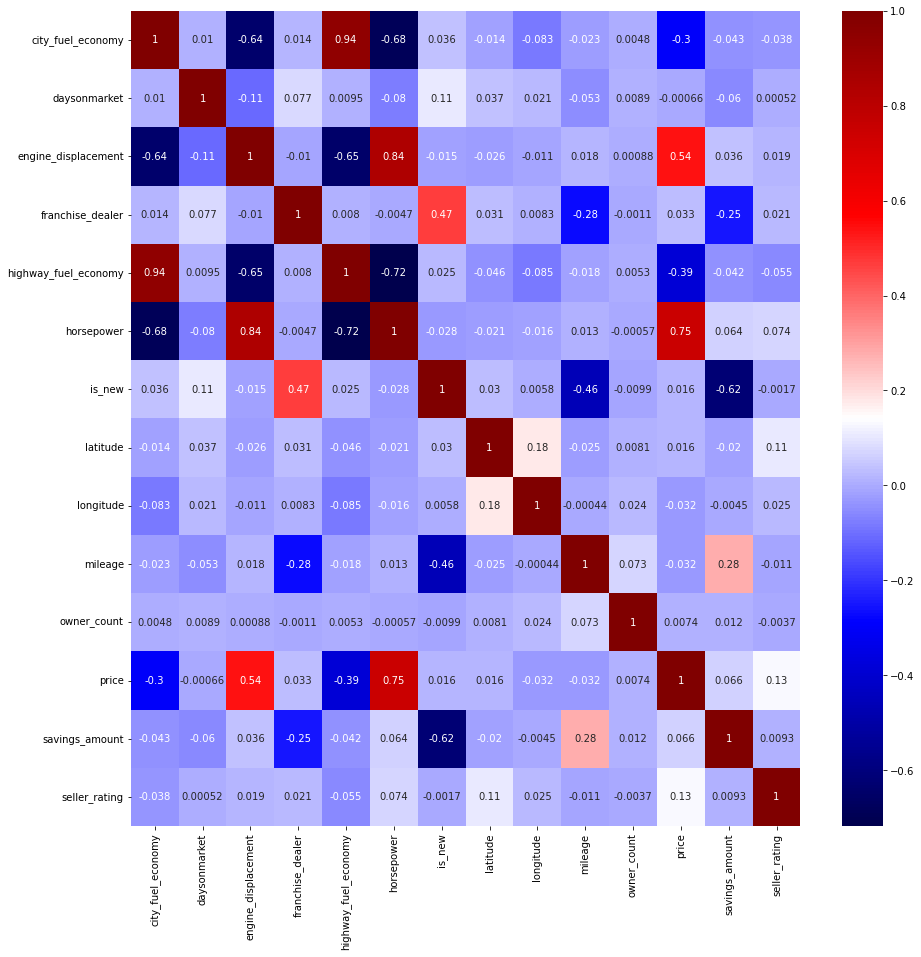

In [12]:
# example of a better corr matrix
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df_num.corr(), cmap="seismic", annot=True, ax=ax);
# more cmaps: https://matplotlib.org/examples/color/colormaps_reference.html

### Correlation and Multicollinearity
We notice that some of the variables are highly correlated.  This is something we might want to take into consideration later.  When 2 predictor variables are highly correlated this is called [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and it is something we want to watch out for as it can destabilize our model.  In the extreme case, when 2 predictors are perfectly correlated then there is absolutely nothing gained by making both variables part of our regression.

The other takeaway from this table is that some of our predictors are highly correlated with our ***target variable Y***.  This is a good thing, it means that these are the variables that we most likely want to include as part of our model as they explain a large amount of the variance in the target variable (correlation=R, variance_explained=R<sup>2</sup>).

Let's try to visualize these correlations all together by using the [***seaborn pairplot***](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function.

> What do you notice?

> Almost all correlations are positive, somewhat normal distributions, etc.

In [13]:
df_num.columns

Index(['city_fuel_economy', 'daysonmarket', 'engine_displacement',
       'franchise_dealer', 'highway_fuel_economy', 'horsepower', 'is_new',
       'latitude', 'longitude', 'mileage', 'owner_count', 'price',
       'savings_amount', 'seller_rating'],
      dtype='object')

In [ ]:
# samp=df_num.sample(10000)
# sns.pairplot(samp, size=3);

### Ordinary Least Squares Regression with Statsmodels
Now that we have a feel for our data, let's jump right in and try a basic regression model.  

#### Statsmodels
We are going to use the [**`statsmodels`**](http://statsmodels.sourceforge.net/) library first.  `statsmodels` is a Python package for implementing [**linear models**](https://en.wikipedia.org/wiki/Linear_model), of which **Linear Regression** is one.  It has a bunch of nice features for evaluating and executing such models.  Essentially, a linear model is one that is a **linear function of the parameters**.  For Linear Regression, this means the parameter $\beta$ (note that here $\beta$ is a **vector** of parameters, which includes $\beta_0$, $\beta_1$, $\beta_2$, etc).  We'll discuss linear models generally later but for  now just accept that Linear Regression is one of these.

#### Modeling with Statsmodels
There are 2 main ways you can generate models with stats models:
- Via the `statsmodels.api` package
- Via the `statsmodels.formula.api` package

For both approaches, you'll need somewhere to use the R formula style formulas for defining the relationship between target variable and feature variables in your model.  ***Statsmodels*** uses [***patsy***](http://patsy.readthedocs.org/en/latest/) to convert this syntax into the proper data matrices for input into its linear models under the covers.  There are a variety of interactions and functions of variables that you can incorporate with this syntax, so feel free to check out the docs.

Here we'll just start by defining a regression model that takes as its inputs each of the 6 predictor variables.  The other parameter of course is the data that the model is to be built from, our pandas dataframe.

This first model fitting is done for you, it fits a multiple linear regression model of the following form (notice the use of [MathJax](https://www.mathjax.org/) for rendering such lovely math equations in markdown):

$$
\widehat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6
$$

##### `statsmodels.api`
To use this method, you need to generate a **matrix** of **features**, **`X`** and a **vector** of **targets**, **`y`** where each row represents a single **observation**.  In statsmodels, you can do this with a call to **`patsy.dmatrices`**:


### 3) Let's Build our 1st Model, 

In [14]:
# Create your feature matrix (X) and target vector (y)

y, X = patsy.dmatrices('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     7671.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:05:46   Log-Likelihood:            -7.3864e+05
No. Observations:               68386   AIC:                         1.477e+06
Df Residuals:                   68372   BIC:                         1.477e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.216e+04    882.992    -25.097      0.000   -2.39e+04   -2.04e+04
franchise_dealer[T.True]  1218.0156    104.570     11.648      0.000    1013.059    1422.973
is_new[T.True]            4411.4007    594.775      7.417      0.000    3245.642    5577.160
city_fuel_economy         1071.1842     25.196     42.513      0.000    1021.799    1120.569
daysonmarket                 7.9249      0.823      9.631      0.000       6.312       9.538
engine_displacement         -4.3607      0.066    -66.478      0.000      -4.489      -4.232
highway_fuel_economy      -763.5492     22.120    -34.519      0.000    -806.904    -720.194
horsepower                 204.6194      1.126    181.650      0.000     202.412     206.827
latitude                    64.8516      9.220      7.034      0.000      46.781      82.922
longitude                  -14.1527      3.301     -4.287      0.000     -20.623      -7.682
mileage                     -0.2044      0.005    -41.062      0.000      -0.214      -0.195
owner_count               1539.4572    351.901      4.375      0.000     849.732    2229.182
savings_amount               1.8951      0.031     61.108      0.000       1.834       1.956
seller_rating             1992.8020     87.166     22.862      0.000    1821.957    2163.647
==============================================================================
Omnibus:                   116314.149   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        344094614.938
Skew:                          11.288   Prob(JB):                         0.00
Kurtosis:                     349.771   Cond. No.                     3.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### `statsmodels.formula.api`
The formula approach handles the creation of the `X` and `y` matrices internally, so all you have to do is supply the R formula for your model when you create your `ols` object.  

**NOTE:** We'll use this for the remainder of these exercises, but many people like to stick with the `dmatrices` and `X`, `y` matrix creation approach because that is the way `sklearn` works (see later).  Notice that here we've built the same model and it's deterministic, so the results are the same.

[Nonrobust vs. robust regression](https://en.wikipedia.org/wiki/Robust_regression#Methods_for_robust_regression)

In [15]:
df_num.head()

,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating
0,NaN,207,2000.0,True,NaN,246.0,True,18.4439,-66.0785,8.0,NaN,46500.0,0,3.0
1,NaN,196,3000.0,True,NaN,340.0,True,18.4439,-66.0785,11.0,NaN,67430.0,0,3.0
2,NaN,137,2000.0,True,NaN,246.0,True,18.4439,-66.0785,7.0,NaN,48880.0,0,3.0
3,NaN,242,2000.0,True,NaN,247.0,True,18.4439,-66.0785,12.0,NaN,66903.0,0,3.0
4,NaN,70,2000.0,True,NaN,247.0,True,18.4439,-66.0785,11.0,NaN,68520.0,0,3.0


In [16]:
# Define the model
lm1 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_num)
# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     7671.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:05:52   Log-Likelihood:            -7.3864e+05
No. Observations:               68386   AIC:                         1.477e+06
Df Residuals:                   68372   BIC:                         1.477e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.216e+04    882.992    -25.097      0.000   -2.39e+04   -2.04e+04
franchise_dealer[T.True]  1218.0156    104.570     11.648      0.000    1013.059    1422.973
is_new[T.True]            4411.4007    594.775      7.417      0.000    3245.642    5577.160
city_fuel_economy         1071.1842     25.196     42.513      0.000    1021.799    1120.569
daysonmarket                 7.9249      0.823      9.631      0.000       6.312       9.538
engine_displacement         -4.3607      0.066    -66.478      0.000      -4.489      -4.232
highway_fuel_economy      -763.5492     22.120    -34.519      0.000    -806.904    -720.194
horsepower                 204.6194      1.126    181.650      0.000     202.412     206.827
latitude                    64.8516      9.220      7.034      0.000      46.781      82.922
longitude                  -14.1527      3.301     -4.287      0.000     -20.623      -7.682
mileage                     -0.2044      0.005    -41.062      0.000      -0.214      -0.195
owner_count               1539.4572    351.901      4.375      0.000     849.732    2229.182
savings_amount               1.8951      0.031     61.108      0.000       1.834       1.956
seller_rating             1992.8020     87.166     22.862      0.000    1821.957    2163.647
==============================================================================
Omnibus:                   116314.149   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        344094614.938
Skew:                          11.288   Prob(JB):                         0.00
Kurtosis:                     349.771   Cond. No.                     3.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression Statistics
From this we get a handful of useful statistics describing our regression. A google search on statistics should yield details for those interested, and we will cover them in depth soon. We will focus on the ***R<sup>2</sup>*** values and the middle table here.

***R<sup>2</sup>*** is the square of the correlation coefficient and represents the estimated percentage of the variance in our target variable ***Y*** that can be explained by our regression model.  ***Adjusted R<sup>2</sup>*** also penalizes for things such as large coefficients and extra variables to try and limit ***overfitting*** so it is often a better measure of model efficacy. We will use that here.

The middle table provides the **coefficients** that are regression has found, along with the **standard error** for each coefficient. This defines our model, aka these are the model parameters that our algorithm was seeking to determine.  

The **t-scores** are values that the coefficients score in the [Student's T Distribution](https://en.wikipedia.org/wiki/Student's_t-distribution) and the **P>|t|** field represents the probability of finding such a t-score if the actual value of the coefficient were 0. In other words, if we had a coefficient whose true value should be 0 (aka the predictor has no impact on the response) then this P-value is the probability of finding such a coefficient value in our regression by random chance. In essence, it measures our degree of belief that the coefficient for each variable should be zero. Thus, the lowest P-values represent the most likely predictors to be impacting the response.

In [ ]:
df.columns

### 5) Impute missing values

## Exercise



In [17]:
df_num=df_num.join(df[['model_name','make_name','engine_type']])

In [18]:
df_num.columns

Index(['city_fuel_economy', 'daysonmarket', 'engine_displacement',
       'franchise_dealer', 'highway_fuel_economy', 'horsepower', 'is_new',
       'latitude', 'longitude', 'mileage', 'owner_count', 'price',
       'savings_amount', 'seller_rating', 'model_name', 'make_name',
       'engine_type'],
      dtype='object')

In [19]:
df_impute=df_num.copy()
df_impute['owner_count']=df_impute['owner_count'].fillna(df_impute['owner_count'].mean())
df_impute.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating
count,1.159806e+06,1.349822e+06,1.285580e+06,1.159806e+06,1.285580e+06,1.349822e+06,1.349822e+06,1.236827e+06,1.349822e+06,1.349822e+06,1.349822e+06,1.337808e+06
mean,2.342415e+01,9.398257e+01,2.886708e+03,2.986534e+01,2.515379e+02,3.672524e+01,-9.082682e+01,9.585190e+02,1.016740e+00,3.726916e+04,9.471036e+01,4.254584e+00
std,8.961661e+00,9.756131e+01,1.390980e+03,7.692250e+00,9.333536e+01,5.046573e+00,1.378741e+01,6.340475e+03,3.165436e-02,1.768516e+04,5.567428e+02,5.063009e-01
min,9.000000e+00,0.000000e+00,7.000000e+02,1.500000e+01,7.800000e+01,1.839880e+01,-1.579020e+02,0.000000e+00,1.000000e+00,3.869000e+02,0.000000e+00,1.000000e+00
25%,1.800000e+01,2.100000e+01,2.000000e+03,2.500000e+01,1.750000e+02,3.316940e+01,-9.716050e+01,2.000000e+00,1.016740e+00,2.543500e+04,0.000000e+00,4.000000e+00
50%,2.200000e+01,5.100000e+01,2.500000e+03,2.900000e+01,2.450000e+02,3.732320e+01,-8.764440e+01,6.000000e+00,1.016740e+00,3.352500e+04,0.000000e+00,4.333333e+00
75%,2.600000e+01,1.620000e+02,3.500000e+03,3.300000e+01,3.100000e+02,4.089280e+01,-8.085220e+01,1.200000e+01,1.016740e+00,4.521700e+04,0.000000e+00,4.583333e+00
max,1.270000e+02,5.680000e+02,7.300000e+03,1.270000e+02,7.970000e+02,4.892370e+01,-6.607850e+01,4.290461e+06,4.000000e+00,2.250000e+06,5.167900e+04,5.000000e+00


In [21]:
# Define the model
lm1 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 1.295e+05
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:06:12   Log-Likelihood:            -1.1118e+07
No. Observations:             1042700   AIC:                         2.224e+07
Df Residuals:                 1042686   BIC:                         2.224e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -1.65e+04    363.207    -45.431      0.000   -1.72e+04   -1.58e+04
franchise_dealer[T.True]  1676.2381     83.202     20.147      0.000    1513.166    1839.310
is_new[T.True]            4042.7715     58.574     69.020      0.000    3927.969    4157.574
city_fuel_economy          531.7696      3.901    136.331      0.000     524.125     539.415
daysonmarket                 7.2888      0.104     70.058      0.000       7.085       7.493
engine_displacement         -4.3197      0.015   -279.316      0.000      -4.350      -4.289
highway_fuel_economy      -503.3257      4.305   -116.925      0.000    -511.763    -494.889
horsepower                 189.7749      0.228    833.651      0.000     189.329     190.221
latitude                    70.1138      2.076     33.773      0.000      66.045      74.183
longitude                  -23.4789      0.749    -31.359      0.000     -24.946     -22.011
mileage                     -0.0465      0.002    -27.026      0.000      -0.050      -0.043
owner_count                724.1666    305.565      2.370      0.018     125.270    1323.063
savings_amount               1.9635      0.023     84.029      0.000       1.918       2.009
seller_rating             2078.8262     20.212    102.854      0.000    2039.212    2118.440
==============================================================================
Omnibus:                  2033484.926   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     165843963884.657
Skew:                          14.118   Prob(JB):                         0.00
Kurtosis:                    1956.576   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df_impute.describe()

In [22]:
df_impute['horsepower']=df_impute[["horsepower","model_name","engine_type"]].groupby(["model_name","engine_type"]).transform(lambda x: x.fillna(x.mean()))
df_impute['engine_displacement']=df_impute[["engine_displacement","model_name","engine_type"]].groupby(["model_name","engine_type"]).transform(lambda x: x.fillna(x.mean()))
df_impute['city_fuel_economy']=df_impute[["city_fuel_economy","model_name","engine_type"]].groupby(["model_name","engine_type"]).transform(lambda x: x.fillna(x.mean()))
df_impute['highway_fuel_economy']=df_impute[["highway_fuel_economy","model_name","engine_type"]].groupby(["model_name","engine_type"]).transform(lambda x: x.fillna(x.mean()))




In [23]:
# No good, let's just drop na's for now
lm1 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_impute)

# Fit the model
fit1 = lm1.fit()

# Print summary statistics of the model's performance
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 1.337e+05
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:06:35   Log-Likelihood:            -1.2297e+07
No. Observations:             1148341   AIC:                         2.459e+07
Df Residuals:                 1148327   BIC:                         2.459e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.802e+04    360.787    -49.948      0.000   -1.87e+04   -1.73e+04
franchise_dealer[T.True]  1966.9553     83.482     23.561      0.000    1803.333    2130.578
is_new[T.True]            3853.9324     58.211     66.206      0.000    3739.840    3968.025
city_fuel_economy          526.6974      3.932    133.967      0.000     518.992     534.403
daysonmarket                 7.4492      0.104     71.746      0.000       7.246       7.653
engine_displacement         -4.6445      0.015   -301.942      0.000      -4.675      -4.614
highway_fuel_economy      -484.1709      4.288   -112.914      0.000    -492.575    -475.767
horsepower                 194.8704      0.224    871.340      0.000     194.432     195.309
latitude                    78.5614      2.059     38.146      0.000      74.525      82.598
longitude                  -22.3250      0.747    -29.872      0.000     -23.790     -20.860
mileage                     -0.0494      0.002    -28.218      0.000      -0.053      -0.046
owner_count               1110.3201    303.803      3.655      0.000     514.876    1705.765
savings_amount               2.0030      0.023     88.001      0.000       1.958       2.048
seller_rating             2084.6746     20.102    103.706      0.000    2045.276    2124.073
==============================================================================
Omnibus:                  2561425.568   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     433525123311.923
Skew:                          19.506   Prob(JB):                         0.00
Kurtosis:                    3012.822   Cond. No.                     2.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
 #we will keep what we've done with imputing owner count 
df_impute=df_num.copy()
df_impute['owner_count']=df_impute['owner_count'].fillna(df_impute['owner_count'].mean())
df_impute.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating
count,1.159806e+06,1.349822e+06,1.285580e+06,1.159806e+06,1.285580e+06,1.349822e+06,1.349822e+06,1.236827e+06,1.349822e+06,1.349822e+06,1.349822e+06,1.337808e+06
mean,2.342415e+01,9.398257e+01,2.886708e+03,2.986534e+01,2.515379e+02,3.672524e+01,-9.082682e+01,9.585190e+02,1.016740e+00,3.726916e+04,9.471036e+01,4.254584e+00
std,8.961661e+00,9.756131e+01,1.390980e+03,7.692250e+00,9.333536e+01,5.046573e+00,1.378741e+01,6.340475e+03,3.165436e-02,1.768516e+04,5.567428e+02,5.063009e-01
min,9.000000e+00,0.000000e+00,7.000000e+02,1.500000e+01,7.800000e+01,1.839880e+01,-1.579020e+02,0.000000e+00,1.000000e+00,3.869000e+02,0.000000e+00,1.000000e+00
25%,1.800000e+01,2.100000e+01,2.000000e+03,2.500000e+01,1.750000e+02,3.316940e+01,-9.716050e+01,2.000000e+00,1.016740e+00,2.543500e+04,0.000000e+00,4.000000e+00
50%,2.200000e+01,5.100000e+01,2.500000e+03,2.900000e+01,2.450000e+02,3.732320e+01,-8.764440e+01,6.000000e+00,1.016740e+00,3.352500e+04,0.000000e+00,4.333333e+00
75%,2.600000e+01,1.620000e+02,3.500000e+03,3.300000e+01,3.100000e+02,4.089280e+01,-8.085220e+01,1.200000e+01,1.016740e+00,4.521700e+04,0.000000e+00,4.583333e+00
max,1.270000e+02,5.680000e+02,7.300000e+03,1.270000e+02,7.970000e+02,4.892370e+01,-6.607850e+01,4.290461e+06,4.000000e+00,2.250000e+06,5.167900e+04,5.000000e+00


In [25]:
# let's just remove missing vals, 

df_not_na=df_impute.dropna()
len(df_not_na)

1042692

In [ ]:
df_not_na.describe()

In [26]:
# refit on df_not_na
lm4 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_not_na)

# Fit the model
fit4 = lm4.fit()

# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 1.295e+05
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:06:55   Log-Likelihood:            -1.1118e+07
No. Observations:             1042692   AIC:                         2.224e+07
Df Residuals:                 1042678   BIC:                         2.224e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -1.65e+04    363.208    -45.432      0.000   -1.72e+04   -1.58e+04
franchise_dealer[T.True]  1676.3927     83.202     20.148      0.000    1513.319    1839.466
is_new[T.True]            4043.2695     58.575     69.028      0.000    3928.465    4158.074
city_fuel_economy          531.7782      3.901    136.333      0.000     524.133     539.423
daysonmarket                 7.2890      0.104     70.060      0.000       7.085       7.493
engine_displacement         -4.3197      0.015   -279.311      0.000      -4.350      -4.289
highway_fuel_economy      -503.3298      4.305   -116.925      0.000    -511.767    -494.893
horsepower                 189.7760      0.228    833.636      0.000     189.330     190.222
latitude                    70.1188      2.076     33.775      0.000      66.050      74.188
longitude                  -23.4771      0.749    -31.356      0.000     -24.945     -22.010
mileage                     -0.0465      0.002    -27.020      0.000      -0.050      -0.043
owner_count                723.8392    305.565      2.369      0.018     124.942    1322.736
savings_amount               1.9639      0.023     84.043      0.000       1.918       2.010
seller_rating             2078.7451     20.212    102.849      0.000    2039.131    2118.359
==============================================================================
Omnibus:                  2033469.077   Durbin-Watson:                   1.775
Prob(Omnibus):                  0.000   Jarque-Bera (JB):     165843976223.155
Skew:                          14.118   Prob(JB):                         0.00
Kurtosis:                    1956.584   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""



### Plotting Residuals
Before we call it a day with this model and dataset, let's take a quick look at a plot of our residuals *(actual value - predicted value)* with this model.  We do this because in a good model we essentially want our errors to be random.  If our residuals look systematic (e.g. missing high for one range and low for another) then we probably are missing the actual functional dependency underlying the data (perhaps it's not really linear).

Take a look [here](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit) for an example of a bad residual plot.

In [27]:
df_not_na.describe()

,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating
count,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06,1.042692e+06
mean,2.303304e+01,9.626302e+01,2.751855e+03,2.957350e+01,2.458630e+02,3.669973e+01,-9.092011e+01,9.843491e+02,1.016737e+00,3.616855e+04,1.037048e+02,4.255917e+00
std,6.472032e+00,9.890208e+01,1.214362e+03,6.130029e+00,8.948614e+01,5.028158e+00,1.384118e+01,6.594312e+03,3.316579e-02,1.672451e+04,5.686800e+02,5.072116e-01
min,9.000000e+00,0.000000e+00,7.000000e+02,1.500000e+01,7.800000e+01,2.132690e+01,-1.579020e+02,0.000000e+00,1.000000e+00,8.866000e+03,0.000000e+00,1.000000e+00
25%,1.900000e+01,2.100000e+01,2.000000e+03,2.500000e+01,1.750000e+02,3.315440e+01,-9.722200e+01,2.000000e+00,1.016740e+00,2.500800e+04,0.000000e+00,4.000000e+00
50%,2.200000e+01,5.400000e+01,2.500000e+03,2.900000e+01,2.370000e+02,3.730280e+01,-8.769550e+01,6.000000e+00,1.016740e+00,3.235100e+04,0.000000e+00,4.333333e+00
75%,2.600000e+01,1.670000e+02,3.500000e+03,3.300000e+01,3.000000e+02,4.088660e+01,-8.087640e+01,1.200000e+01,1.016740e+00,4.399500e+04,0.000000e+00,4.588235e+00
max,1.070000e+02,5.680000e+02,6.800000e+03,9.300000e+01,7.970000e+02,4.886160e+01,-6.722670e+01,4.290461e+06,4.000000e+00,2.175000e+06,5.167900e+04,5.000000e+00


In [28]:
from scipy import stats
def diagnostic_plot(x,y,model):
    plt.figure(figsize=(12,6))
    
    try:
        pred=model.predict()
        res=model.resid
    except: 
        pred=model.predict(X)
        res=y-pred
        

    plt.subplot(1, 2, 1)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_9245/16897085.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_not_na.drop('price',1)


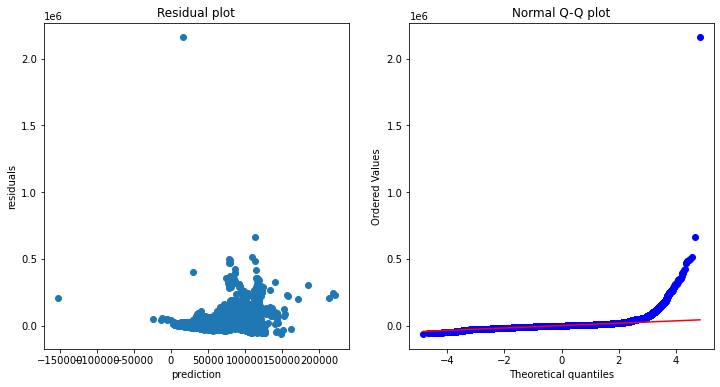

In [29]:
y=df_not_na.price
X=df_not_na.drop('price',1)
diagnostic_plot(X,y,fit4)

In [30]:
pred=fit4.predict()
res=fit4.resid

df_not_na.iloc[np.where(np.abs(res)>1000000)]

,city_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_new,latitude,longitude,mileage,owner_count,price,savings_amount,seller_rating,model_name,make_name,engine_type
955736,25.0,75,2000.0,True,32.0,141.0,False,37.7364,-100.019,570.0,1.01674,2175000.0,0,4.8,Rogue Sport,Nissan,I4


In [31]:
### Wow! 

df_not_na=df_not_na.drop(955736)

In [32]:
# refit on df_not_na
lm5 = smf.ols('price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_not_na)

# Fit the model
fit5 = lm5.fit()

# Print summary statistics of the model's performance
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.352e+05
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:17   Log-Likelihood:            -1.1096e+07
No. Observations:             1042691   AIC:                         2.219e+07
Df Residuals:                 1042677   BIC:                         2.219e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.651e+04    355.543    -46.436      0.000   -1.72e+04   -1.58e+04
franchise_dealer[T.True]  1639.5913     81.447     20.131      0.000    1479.959    1799.224
is_new[T.True]            4109.3849     57.339     71.668      0.000    3997.002    4221.768
city_fuel_economy          531.8545      3.818    139.292      0.000     524.371     539.338
daysonmarket                 7.2853      0.102     71.534      0.000       7.086       7.485
engine_displacement         -4.3216      0.015   -285.455      0.000      -4.351      -4.292
highway_fuel_economy      -503.0970      4.214   -119.391      0.000    -511.356    -494.838
horsepower                 189.8401      0.223    851.896      0.000     189.403     190.277
latitude                    70.0311      2.032     34.460      0.000      66.048      74.014
longitude                  -23.3541      0.733    -31.864      0.000     -24.791     -21.918
mileage                     -0.0459      0.002    -27.241      0.000      -0.049      -0.043
owner_count                719.0989    299.116      2.404      0.016     132.841    1305.357
savings_amount               1.9796      0.023     86.542      0.000       1.935       2.024
seller_rating             2073.9561     19.785    104.824      0.000    2035.178    2112.734
==============================================================================
Omnibus:                  1250833.946   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        948894823.134
Skew:                           5.758   Prob(JB):                         0.00
Kurtosis:                     150.338   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_9245/2906724946.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_not_na.drop('price',1)


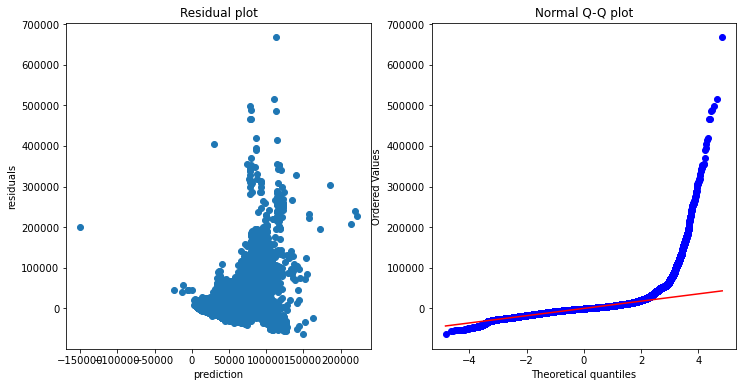

In [33]:
y=df_not_na.price
X=df_not_na.drop('price',1)
diagnostic_plot(X,y,fit5)

### 6) Try a Log Transformation

To use the ladder of powers, visualize the original, untransformed data as starting at θ=1. Then if the
data are right-skewed (clustered at lower values) move down the ladder of powers (that is, try square root,
cube root, logarithmic, etc. transformations). If the data are left-skewed (clustered at higher values) move
up the ladder of powers (cube, square, etc). 

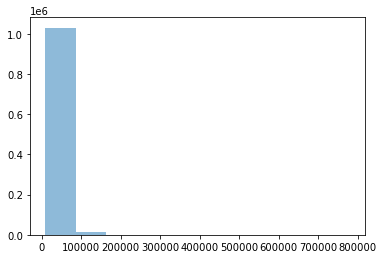

In [34]:
plt.hist(df_not_na['price'],alpha=.5);

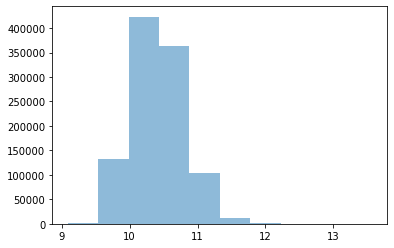

In [35]:
# Try log transform of response variable : 
df_not_na['logged_price']=np.log(df_not_na.price)
plt.hist(df_not_na['logged_price'],alpha=.5);

In [36]:
## improvement *!* 
lm6 = smf.ols('logged_price~city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_not_na)


# Fit the model
fit6 = lm6.fit()

# Print summary statistics of the model's performance
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 2.100e+05
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:32   Log-Likelihood:             1.8208e+05
No. Observations:             1042691   AIC:                        -3.641e+05
Df Residuals:                 1042677   BIC:                        -3.640e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.2687      0.007   1298.918      0.000       9.255       9.283
franchise_dealer[T.True]     0.1061      0.002     64.935      0.000       0.103       0.109
is_new[T.True]               0.0840      0.001     72.994      0.000       0.082       0.086
city_fuel_economy            0.0163   7.66e-05    213.095      0.000       0.016       0.016
daysonmarket              3.314e-05   2.04e-06     16.214      0.000    2.91e-05    3.71e-05
engine_displacement      -8.223e-05   3.04e-07   -270.645      0.000   -8.28e-05   -8.16e-05
highway_fuel_economy        -0.0202   8.46e-05   -239.322      0.000      -0.020      -0.020
horsepower                   0.0043   4.47e-06    950.983      0.000       0.004       0.004
latitude                     0.0029   4.08e-05     71.913      0.000       0.003       0.003
longitude                   -0.0005   1.47e-05    -32.050      0.000      -0.001      -0.000
mileage                  -1.297e-06   3.38e-08    -38.356      0.000   -1.36e-06   -1.23e-06
owner_count                 -0.0234      0.006     -3.893      0.000      -0.035      -0.012
savings_amount            2.868e-05   4.59e-07     62.478      0.000    2.78e-05    2.96e-05
seller_rating                0.0557      0.000    140.379      0.000       0.055       0.057
==============================================================================
Omnibus:                    36619.464   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86679.303
Skew:                           0.192   Prob(JB):                         0.00
Kurtosis:                       4.359   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X.columns

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_9245/3294470911.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_not_na.drop((['price']),1)


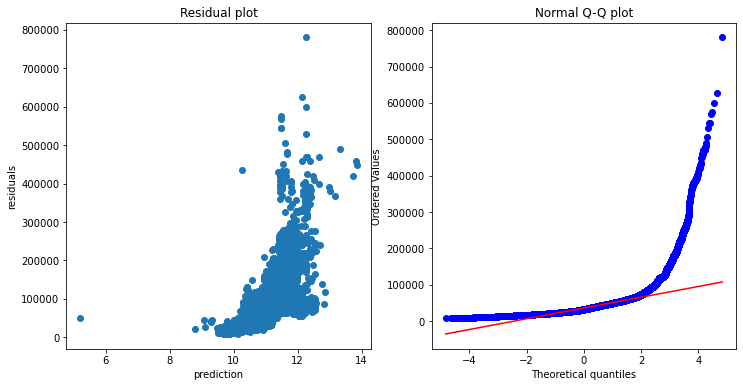

In [39]:
y=df_not_na.price
X=df_not_na.drop((['price']),1)
diagnostic_plot(X,y,fit6)

In [40]:
pred=fit6.predict()
res=fit6.resid

df_not_na.iloc[np.argmin(pred)]

city_fuel_economy                 16.0
daysonmarket                         4
engine_displacement             5300.0
franchise_dealer                  True
highway_fuel_economy              22.0
horsepower                       355.0
is_new                            True
latitude                       41.4427
longitude                     -86.0155
mileage                      4290461.0
owner_count                    1.01674
price                          50775.0
savings_amount                       0
seller_rating                      5.0
model_name              Silverado 1500
make_name                    Chevrolet
engine_type                         V8
logged_price                 10.835159
Name: 86050, dtype: object

### #7   Final Check  :Linear Regression Assumptions  




In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

# # A decent rule of thumb is VIF should not be > 5 
# variables=lm5.exog
# vif= [VIF(variables,i) for i in range(variables.shape[1])]
# z=zip(lm5.exog_names,vif)
# for i in z:
#     print(i)

### #7   Bring in Categorical variables






In [41]:
## Let's start off by only using numerical vals 
cat_cols=df.dtypes[df.dtypes=='object'].index
df_cat=df[cat_cols]

for i in df_cat.columns:
    print(i)

vin
back_legroom
bed
bed_height
bed_length
body_type
cabin
city
dealer_zip
description
engine_cylinders
engine_type
exterior_color
fleet
frame_damaged
franchise_make
front_legroom
fuel_tank_volume
fuel_type
has_accidents
height
interior_color
isCab
is_cpo
is_oemcpo
length
listed_date
listing_color
main_picture_url
major_options
make_name
maximum_seating
model_name
power
salvage
sp_name
theft_title
torque
transmission
transmission_display
trimId
trim_name
wheel_system
wheel_system_display
wheelbase
width


In [42]:
df.dealer_zip.value_counts()

33619    3376
91401    2975
85297    2912
85382    2867
77388    2841
         ... 
53225       1
97470       1
46041       1
55117       1
95819       1
Name: dealer_zip, Length: 5806, dtype: int64

In [43]:
def normalize_torque(x):
    try:
        lb_ft=int(x.split()[0])
        rpm=int(x.split()[3].replace(',',''))
        return lb_ft/rpm
    except:
        return np.nan
    

In [44]:
df_not_na=df_not_na.join(df['torque'])

In [45]:
df_not_na['torque_norm']=df_not_na['torque'].apply(normalize_torque)
df_not_na['torque_norm']=df_not_na['torque_norm'].fillna(df_not_na['torque_norm'].median())

In [46]:
lm7 = smf.ols('logged_price~torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_not_na)

# Fit the model
fit7 = lm7.fit()

# Print summary statistics of the model's performance
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                 1.950e+05
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:08:27   Log-Likelihood:             1.8217e+05
No. Observations:             1042691   AIC:                        -3.643e+05
Df Residuals:                 1042676   BIC:                        -3.641e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    9.2757      0.007   1296.369      0.000       9.262       9.290
franchise_dealer[T.True]     0.1063      0.002     65.057      0.000       0.103       0.110
is_new[T.True]               0.0840      0.001     73.023      0.000       0.082       0.086
torque_norm                 -0.0227      0.002    -13.157      0.000      -0.026      -0.019
city_fuel_economy            0.0164   7.72e-05    213.183      0.000       0.016       0.017
daysonmarket              3.473e-05   2.05e-06     16.965      0.000    3.07e-05    3.87e-05
engine_displacement      -8.297e-05   3.09e-07   -268.594      0.000   -8.36e-05   -8.24e-05
highway_fuel_economy        -0.0205   8.62e-05   -237.355      0.000      -0.021      -0.020
horsepower                   0.0043   4.48e-06    950.314      0.000       0.004       0.004
latitude                     0.0029   4.08e-05     71.584      0.000       0.003       0.003
longitude                   -0.0005   1.47e-05    -32.084      0.000      -0.001      -0.000
mileage                  -1.297e-06   3.38e-08    -38.339      0.000   -1.36e-06   -1.23e-06
owner_count                 -0.0234      0.006     -3.903      0.000      -0.035      -0.012
savings_amount            2.878e-05   4.59e-07     62.692      0.000    2.79e-05    2.97e-05
seller_rating                0.0559      0.000    140.636      0.000       0.055       0.057
==============================================================================
Omnibus:                    37188.843   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            87976.695
Skew:                           0.197   Prob(JB):                         0.00
Kurtosis:                       4.367   Cond. No.                     3.02e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
## Let's start off by only using numerical vals 
cat_cols=df.dtypes[df.dtypes=='object'].index
df_cat=df[cat_cols]

for i in df_cat.columns:
    print(i)

vin
back_legroom
bed
bed_height
bed_length
body_type
cabin
city
dealer_zip
description
engine_cylinders
engine_type
exterior_color
fleet
frame_damaged
franchise_make
front_legroom
fuel_tank_volume
fuel_type
has_accidents
height
interior_color
isCab
is_cpo
is_oemcpo
length
listed_date
listing_color
main_picture_url
major_options
make_name
maximum_seating
model_name
power
salvage
sp_name
theft_title
torque
transmission
transmission_display
trimId
trim_name
wheel_system
wheel_system_display
wheelbase
width


In [48]:
## Let's use domain knowledge to pick the BEST! 
# engine_cylinders ~ engine_type
df_comb=df_not_na.join(df[['wheel_system','has_accidents','transmission','dealer_zip','fuel_type','maximum_seating']])

print(df_comb.wheel_system.value_counts())
print('\n')
print(df_comb.has_accidents.value_counts())
print('\n')
print(df_comb.make_name.value_counts())
print('\n')
print(df_comb.model_name.value_counts())
print('\n')
print(df_comb.dealer_zip.value_counts())
print('\n')
print(df_comb.fuel_type.value_counts())
print('\n')
print(df_comb.maximum_seating.value_counts())

FWD    459904
AWD    265155
4WD    220207
RWD     51845
4X2     44948
Name: wheel_system, dtype: int64


False    108489
True       2638
Name: has_accidents, dtype: int64


Ford             195339
Chevrolet        123371
Honda             92474
Nissan            87466
Toyota            76344
Jeep              63950
Hyundai           41380
RAM               34642
Buick             30846
GMC               30005
Dodge             28164
Volkswagen        24697
Kia               23864
Mazda             22355
Subaru            22268
Cadillac          21871
Mercedes-Benz     17804
Lincoln           14686
BMW               14053
Chrysler          10813
Lexus             10717
Acura              9949
Audi               8256
Mitsubishi         7937
INFINITI           7467
Volvo              5866
Land Rover         5173
Jaguar             2940
Porsche            2813
Alfa Romeo         1687
MINI               1428
Maserati            872
FIAT                453
Aston Martin        250
Genesis    

In [49]:
df_comb.maximum_seating=df_comb.maximum_seating.apply(lambda x: x.split()[0])

In [50]:
### Let's simplify a bit, : 

common_engines=df_comb.engine_type.value_counts().index[df_comb.engine_type.value_counts()>2000]
df_comb['engine_clean']=df_comb.engine_type.apply(lambda x:x if x in common_engines else 'Other')

common_makes=df_comb.make_name.value_counts().index[df_comb.make_name.value_counts()>10000]
df_comb['makes_clean']=df_comb.make_name.apply(lambda x:x if x in common_makes else 'Other')

common_models=df_comb.model_name.value_counts().index[df_comb.model_name.value_counts()>10000]
df_comb['models_clean']=df_comb.model_name.apply(lambda x:x if x in common_models else 'Other')

common_zips=df_comb.dealer_zip.value_counts().index[df_comb.dealer_zip.value_counts()>500]
df_comb['zips_clean']=df_comb.dealer_zip.apply(lambda x:x if x in common_zips else 'Other')

In [51]:
# STUDENT SECTION  : Create a new model using new dummy features, what do you think? 

In [52]:
# Statsmodels will create dummy categorical variables for us, 

lm8 = smf.ols('logged_price~maximum_seating + wheel_system+has_accidents+transmission+zips_clean+fuel_type+models_clean+makes_clean+engine_clean+torque_norm+city_fuel_economy+daysonmarket+engine_displacement+franchise_dealer+highway_fuel_economy+horsepower+is_new+latitude+longitude+mileage+owner_count+savings_amount+seller_rating', data=df_comb)

# Fit the model
fit8 = lm8.fit()

# Print summary statistics of the model's performance
fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logged_price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     1496.
Date:                Wed, 08 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:09:34   Log-Likelihood:                 66252.
No. Observations:              110018   AIC:                        -1.313e+05
Df Residuals:                  109391   BIC:                        -1.252e+05
Df Model:                         626                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                8.5757      0.049    176.754      0.000       8.481       8.671
maximum_seating[T.2]                    -0.1641      0.031     -5.378      0.000      -0.224      -0.104
maximum_seating[T.3]                    -0.5824      0.031    -18.831      0.000      -0.643      -0.522
maximum_seating[T.4]                    -0.3903      0.030    -12.853      0.000      -0.450      -0.331
maximum_seating[T.5]                    -0.2916      0.030     -9.614      0.000      -0.351      -0.232
maximum_seating[T.6]                    -0.4704      0.030    -15.443      0.000      -0.530      -0.411
maximum_seating[T.7]                    -0.3047      0.030    -10.040      0.000      -0.364      -0.245
maximum_seating[T.8]                    -0.2229      0.030     -7.324      0.000      -0.283      -0.163
maximum_seating[T.9]                    -0.2599      0.037     -7.089      0.000      -0.332      -0.188
wheel_system[T.4X2]                     -0.0922      0.002    -42.586      0.000      -0.096      -0.088
wheel_system[T.AWD]                     -0.0355      0.002    -15.396      0.000      -0.040      -0.031
wheel_system[T.FWD]                     -0.1075      0.002    -50.014      0.000      -0.112      -0.103
wheel_system[T.RWD]                     -0.0772      0.003    -25.975      0.000      -0.083      -0.071
has_accidents[T.True]                   -0.0337      0.003    -12.547      0.000      -0.039      -0.028
transmission[T.CVT]                     -0.0270      0.002    -14.622      0.000      -0.031      -0.023
transmission[T.Dual Clutch]              0.0480      0.011      4.505      0.000       0.027       0.069
transmission[T.M]                       -0.0591      0.005    -11.061      0.000      -0.070      -0.049
zips_clean[T.1501]                      -0.0449      0.018     -2.438      0.015      -0.081      -0.009
zips_clean[T.1760]                      -0.0561      0.017     -3.353      0.001      -0.089      -0.023
zips_clean[T.1923]                      -0.0209      0.031     -0.665      0.506      -0.082       0.041
zips_clean[T.2062]                      -0.0112      0.019     -0.580      0.562      -0.049       0.027
zips_clean[T.2122]                      -0.1004      0.056     -1.806      0.071      -0.209       0.009
zips_clean[T.2184]                      -0.0744      0.049     -1.534      0.125      -0.170       0.021
zips_clean[T.2767]                      -0.0394      0.020     -1.984      0.047      -0.078      -0.000
zips_clean[T.2919]                      -0.0873      0.019     -4.568      0.000      -0.125      -0.050
zips_clean[T.3060]                      -0.0842      0.021     -3.937      0.000      -0.126      -0.042
zips_clean[T.3103]                    

In [53]:
df_comb.savings_amount.head()

27    3866
75       0
76    5764
77       0
78       0
Name: savings_amount, dtype: int64

# Regression with sklearn
Statsmodels has decent functionality for linear models, and is great for statistical summaries. But, scikit-learn has more modeling options for all sorts of algorithms as well as data preparation and is growing every day, so we will generally be working with that from here on.

### Regression with sklearn
Before we jump into some of the additional features of sklearn, let's try to repeat what we have so far using sklearn's built in **LinearRegression**.


In [ ]:
df_dummies= pd.get_dummies(df_comb[['transmission','engine_clean','makes_clean','models_clean','zips_clean','wheel_system','zips_clean','fuel_type','has_accidents']],drop_first=True)

### combine with the previous
df_comb=df_comb.drop(['model_name','make_name','engine_type','torque','dealer_zip','transmission','engine_clean','makes_clean','models_clean','zips_clean','wheel_system','zips_clean','fuel_type','has_accidents'],1).join(df_dummies)

In [ ]:
# Create an empty model
# warning!  may take awhile to run. .
# sklearn : automatially fits intercept
lr = LinearRegression(n_jobs=4)

y=df_comb.logged_price
X=df_comb.drop(['price','logged_price'],1)

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_9245/1234960615.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_comb.drop(['price','logged_price'],1)


## sklearn: What's in a model?
Essentially all models in `sklearn` inherit from the same type of "estimator" interface.  This means they'll share common methods that we'll see over and over again like:
- `fit()`: Fit a model to a set of training data
- `score()`: Score the performance of a model on a given sample of data with known _ground truth_ dependent variables
- `predict()`: Predict target/response variables based on a sample of independent variables (features, predictors, etc)

Additionally, models are usually loaded with other goodies once they've been fit, which can provide information about the resulting fitted model.  For instance, the following might be of interest in regression:
- `intercept_`: our $\beta_0$ intercept in our regression model
- `coef_`: the other $\beta$s in our model

## Exercise
Let's print those out:

In [47]:
z=zip(np.abs(lr.coef_),X.columns)
z=sorted(z)
for i in z:
    print(i)

(0.0038320535454898774, 'maximum_nights')
(0.03052636629027039, 'calculated_host_listings_count')
(0.07979157471145966, 'sq_ft_med')
(0.299619667261275, 'neighborhood_clean_Stevens')
(0.5623051926115333, 'neighborhood_clean_University District')
(0.7525764300956723, 'host_listings_count')
(1.4072688741903545, 'review_scores_rating')
(1.5345911509950652, 'review_scores_communication')
(1.7006266755291988, 'neighborhood_clean_North Beacon Hill')
(2.9745686834450464, 'review_scores_checkin')
(4.240511480533952, 'review_scores_cleanliness')
(4.994735611329661, 'bedrooms')
(5.780510979611112, 'neighborhood_clean_Greenwood')
(6.322786230598183, 'latitude')
(6.49947307665044, 'type_clean_Other')
(8.526046895244978, 'review_scores_accuracy')
(10.898513961127904, 'review_scores_location')
(12.656619236098365, 'neighborhood_clean_Wallingford')
(13.141362365833682, 'review_scores_value')
(15.202439283707713, 'neighborhood_clean_Minor')
(20.649037211535234, 'accommodates')
(21.31297009972869, 'nei

In [48]:
resids=y-lr.predict(X)

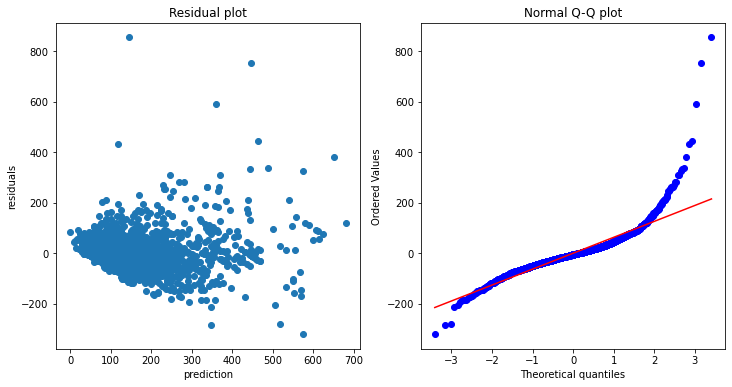

In [57]:
# We've made some improvements, let's see how our residuals look now, 

diagnostic_plot(X,y,lr)

In [59]:
df_comb2=df_comb.join(df_cat.amenities)

In [80]:
df_comb2.iloc[np.where(resids>200)]

,sq_ft_med,avg_aug_price,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,maximum_nights,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,neighborhood_clean_Belltown,neighborhood_clean_Capitol Hill,neighborhood_clean_Central Business District,neighborhood_clean_First Hill,neighborhood_clean_Fremont,neighborhood_clean_Greenwood,neighborhood_clean_Minor,neighborhood_clean_North Beacon Hill,neighborhood_clean_Other,neighborhood_clean_Queen Anne,neighborhood_clean_Stevens,neighborhood_clean_University District,neighborhood_clean_Wallingford,type_clean_House,type_clean_Other,type_clean_Townhouse,amenities,len_amentites,pool,parking,breakfast,hot_tub
191,1600.0,630.000000,5.0,47.658831,-122.347967,8,2.5,3.0,1125,10.0,96.0,10.0,10.0,10.0,10.0,10.0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2151,0,1,0,0
192,1600.0,590.000000,5.0,47.654102,-122.338511,8,3.0,3.0,1125,10.0,97.0,10.0,10.0,10.0,10.0,9.0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2151,0,1,0,0
303,1800.0,550.000000,1.0,47.631526,-122.356283,6,2.5,3.0,14,10.0,98.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2151,0,1,0,0
392,1600.0,500.000000,1.0,47.616088,-122.288502,4,2.0,3.0,10,9.0,93.0,9.0,10.0,10.0,9.0,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2151,0,1,0,1
418,1600.0,610.000000,5.0,47.661217,-122.339424,8,2.5,3.0,1125,10.0,95.0,10.0,10.0,10.0,10.0,9.0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",2151,0,1,0,0
547,550.0,300.000000,1.0,47.619565,-122.311730,2,1.0,1.0,1125,10.0,94.0,9.0,10.0,10.0,10.0,9.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,"{Internet,""Wireless Internet"",Kitchen,""Buzzer/...",2151,0,0,0,0
823,1600.0,950.000000,1.0,47.641620,-122.389725,6,3.5,3.0,1125,10.0,96.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Po...",2151,1,1,0,1
862,1600.0,490.322581,3.0,47.622977,-122.301772,6,1.0,3.0,365,10.0,98.0,10.0,10.0,10.0,10.0,10.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2151,0,0,0,0
907,1600.0,680.000000,1.0,47.648572,-122.340759,6,3.0,3.0,1125,10.0,100.0,10.0,10.0,10.0,10.0,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,"{TV,""Cable TV"",""Air Conditioning"",Kitchen,""Fre...",2151,0,1,0,0
977,3000.0,1033.064516,2.0,47.629724,-122.369483,11,4.5,5.0,30,10.0,97.0,10.0,10.0,10.0,10.0,10.0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2151,0,1,0,1


In [ ]:
for i in df_comb2.amenities:
    print(i)

In [90]:
df_comb2['len_amentites']=df_comb2.amenities.apply(lambda x:len(x))
df_comb2['pool']=df_comb2.amenities.apply(lambda x: 1 if 'Pool' in x else 0)
df_comb2['parking']=df_comb2.amenities.apply(lambda x: 1 if 'Free Parking' in x else 0)
df_comb2['breakfast']=df_comb2.amenities.apply(lambda x: 1 if 'Breakfast' in x else 0)
df_comb2['hot_tub']=df_comb2.amenities.apply(lambda x: 1 if 'Hot Tub' in x else 0)

In [91]:
df_comb2['len_amentites'].describe()

count    2151.000000
mean      198.717341
std        67.886184
min         2.000000
25%       153.000000
50%       198.000000
75%       243.000000
max       444.000000
Name: len_amentites, dtype: float64

In [92]:
# Create an empty model
lr = LinearRegression()

y=df_comb2.avg_aug_price
X=df_comb2.drop(['avg_aug_price','amenities'],1)

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_14394/1012827351.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_comb2.drop(['avg_aug_price','amenities'],1)


0.6784281375778822

In [93]:
df_comb3=df_comb2.join(df['cleaning_fee'])

In [72]:
df_comb3.cleaning_fee.value_counts(dropna=False)

NaN        519
$50.00     166
$25.00     138
$20.00     108
$60.00     103
          ... 
$58.00       1
$87.00       1
$68.00       1
$108.00      1
$112.00      1
Name: cleaning_fee, Length: 97, dtype: int64

In [94]:
df_comb3.cleaning_fee=df_comb3.cleaning_fee.astype(str).apply(lambda x:x.replace('$','')).astype(float)
df_comb3['clean_fee_med'] = df_comb3[["bedrooms","cleaning_fee"]].groupby("bedrooms").transform(lambda x: x.fillna(x.median()))

In [95]:
y=df_comb3.avg_aug_price
X=df_comb3.drop(['avg_aug_price','amenities','cleaning_fee'],1)

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_14394/143536614.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_comb3.drop(['avg_aug_price','amenities','cleaning_fee'],1)


0.7093685576062418

In [96]:
df_comb4=df_comb3[df_comb3.avg_aug_price<500]

y=df_comb4.avg_aug_price
X=df_comb4.drop(['avg_aug_price','amenities','cleaning_fee'],1)

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_14394/3552198996.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_comb4.drop(['avg_aug_price','amenities','cleaning_fee'],1)


0.716978344308993

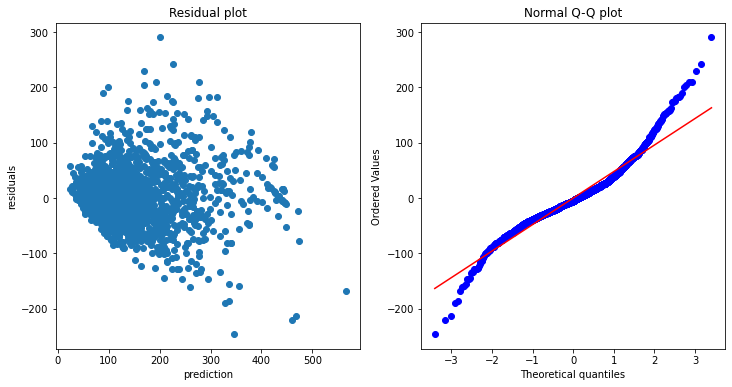

In [78]:
diagnostic_plot(X,y,lr)

,sq_ft_med,avg_aug_price,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,maximum_nights,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,neighborhood_clean_Belltown,neighborhood_clean_Capitol Hill,neighborhood_clean_Central Business District,neighborhood_clean_First Hill,neighborhood_clean_Fremont,neighborhood_clean_Greenwood,neighborhood_clean_Minor,neighborhood_clean_North Beacon Hill,neighborhood_clean_Other,neighborhood_clean_Queen Anne,neighborhood_clean_Stevens,neighborhood_clean_University District,neighborhood_clean_Wallingford,type_clean_House,type_clean_Other,type_clean_Townhouse,amenities,len_amentites,pool,parking,breakfast,hot_tub,cleaning_fee,clean_fee_med
325,1000.0,105.000000,1.0,47.704848,-122.344887,6,1.0,2.0,365,9.0,92.0,9.0,9.0,9.0,8.0,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",100,0,1,0,0,30.0,30.0
635,550.0,114.612903,5.0,47.606461,-122.307478,2,3.0,1.0,29,10.0,100.0,10.0,10.0,10.0,10.0,10.0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,""Fr...",238,0,1,1,0,30.0,30.0
836,1000.0,200.967742,1.0,47.649271,-122.347817,6,1.0,2.0,29,10.0,98.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,"{TV,Internet,""Wireless Internet"",Kitchen,""Pets...",252,0,0,0,0,50.0,50.0
1316,1000.0,100.000000,1.0,47.617865,-122.322030,3,1.0,2.0,1125,9.0,80.0,9.0,9.0,10.0,10.0,9.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"{Internet,""Wireless Internet"",Kitchen,Heating,...",130,0,0,0,0,NaN,85.0


In [83]:
df_comb3.describe()

,sq_ft_med,avg_aug_price,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,maximum_nights,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,neighborhood_clean_Belltown,neighborhood_clean_Capitol Hill,neighborhood_clean_Central Business District,neighborhood_clean_First Hill,neighborhood_clean_Fremont,neighborhood_clean_Greenwood,neighborhood_clean_Minor,neighborhood_clean_North Beacon Hill,neighborhood_clean_Other,neighborhood_clean_Queen Anne,neighborhood_clean_Stevens,neighborhood_clean_University District,neighborhood_clean_Wallingford,type_clean_House,type_clean_Other,type_clean_Townhouse,len_amentites,pool,parking,breakfast,hot_tub,cleaning_fee,clean_fee_med
count,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.0,2151.000000,2151.000000,2151.000000,2151.000000,1632.000000,2151.000000
mean,738.517434,152.319182,7.338447,47.629406,-122.333347,3.396095,1.276383,1.310088,765.451418,9.618782,94.419340,9.536960,9.781962,9.807531,9.597861,9.427708,3.341237,0.046490,0.083217,0.022315,0.027429,0.042306,0.019991,0.059972,0.030219,0.461646,0.047420,0.025105,0.028824,0.043236,0.475128,0.063691,0.024175,2151.0,0.045095,0.577406,0.076244,0.080893,63.139093,58.148768
std,394.621499,120.782470,24.832571,0.043554,0.032054,2.043313,0.597647,0.871292,497.852524,0.703282,6.448355,0.804872,0.570084,0.528411,0.625486,0.739110,6.845387,0.210593,0.276274,0.147741,0.163368,0.201333,0.140001,0.237490,0.171228,0.498643,0.212585,0.156479,0.167350,0.203435,0.499497,0.244259,0.153627,0.0,0.207561,0.494087,0.265449,0.272734,51.123127,46.746344
min,0.000000,25.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,2.000000,40.000000,3.000000,4.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2151.0,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,550.000000,78.000000,1.000000,47.608153,-122.356074,2.000000,1.000000,1.000000,90.000000,9.000000,93.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2151.0,0.000000,0.000000,0.000000,0.000000,25.000000,35.000000
50%,550.000000,115.000000,1.000000,47.624059,-122.329137,3.000000,1.000000,1.000000,1125.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2151.0,0.000000,1.000000,0.000000,0.000000,50.000000,40.000000
75%,1000.000000,179.500000,3.000000,47.663540,-122.309871,4.000000,1.000000,2.000000,1125.000000,10.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2151.0,0.000000,1.000000,0.000000,0.000000,85.000000,75.000000
max,3000.000000,1199.000000,354.000000,47.732647,-122.254189,16.000000,5.000000,6.000000,1125.000000,10.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2151.0,1.000000,1.000000,1.000000,1.000000,300.000000,300.000000


In [98]:
df_comb5=df_comb4[df_comb4.cleaning_fee < df_comb4.avg_aug_price]

y=df_comb5.avg_aug_price
X=df_comb5.drop(['avg_aug_price','amenities','cleaning_fee'],1)

# Fit the model to the full dataset
lr.fit(X, y)

# Print out the R^2 for the model against the full dataset
lr.score(X,y)

/var/folders/jn/625fnnbs1jg77y82ld96q65w0000gn/T/ipykernel_14394/3431358995.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=df_comb5.drop(['avg_aug_price','amenities','cleaning_fee'],1)


0.7630061602011247

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3)

In [100]:
# Fit the model to the Training data
lr.fit(X_train, y_train)
print('Train R^2: {:6.3f}'.format(lr.score(X_train,y_train)))

# Print out the R^2 for the model against the full dataset
print('Train R^2: {:6.3f}'.format(lr.score(X_val,y_val)))

Train R^2:  0.767
Train R^2:  0.763


In [101]:
### Feature Interpretation

feat_df=pd.DataFrame({'coef':lr.coef_,'features':X.columns,'abs_val_coef':np.abs(lr.coef_)}).sort_values(by='abs_val_coef')
feat_df.tail(10)

,coef,features,abs_val_coef
24,25.022659,neighborhood_clean_Other,25.022659
26,30.167182,neighborhood_clean_Stevens,30.167182
17,37.808926,neighborhood_clean_Capitol Hill,37.808926
33,37.985722,pool,37.985722
19,39.870191,neighborhood_clean_First Hill,39.870191
25,43.532810,neighborhood_clean_Queen Anne,43.532810
16,45.813886,neighborhood_clean_Belltown,45.813886
2,-56.737996,latitude,56.737996
18,58.503027,neighborhood_clean_Central Business District,58.503027
3,-200.375413,longitude,200.375413


##### Pickling for Later
We're going to come back to this dataset!  So let's pickle it away for later...

`sklearn`, `pandas` and `statsmodels` have their own respective methods for "pickling" their objects.

**Pandas:**

To pickle a `pandas.DataFrame` use the [`to_pickle()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html) method.  Use this now to pickle your training data `df` now.

In [104]:
preds = lr.predict(X)
resids = y-preds
df_comb5.iloc[np.where(np.abs(resids)>200)]

,sq_ft_med,avg_aug_price,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,maximum_nights,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,neighborhood_clean_Belltown,neighborhood_clean_Capitol Hill,neighborhood_clean_Central Business District,neighborhood_clean_First Hill,neighborhood_clean_Fremont,neighborhood_clean_Greenwood,neighborhood_clean_Minor,neighborhood_clean_North Beacon Hill,neighborhood_clean_Other,neighborhood_clean_Queen Anne,neighborhood_clean_Stevens,neighborhood_clean_University District,neighborhood_clean_Wallingford,type_clean_House,type_clean_Other,type_clean_Townhouse,amenities,len_amentites,pool,parking,breakfast,hot_tub,cleaning_fee,clean_fee_med
428,1000.0,402.580645,2.0,47.633403,-122.342631,5,2.0,2.0,1125,8.0,76.0,7.0,8.0,9.0,9.0,8.0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",194,0,1,0,0,75.0,75.0
862,1600.0,490.322581,3.0,47.622977,-122.301772,6,1.0,3.0,365,10.0,98.0,10.0,10.0,10.0,10.0,10.0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",282,0,0,0,0,65.0,65.0
1130,1000.0,468.032258,1.0,47.670814,-122.327486,6,2.5,2.0,1125,9.0,91.0,9.0,10.0,10.0,10.0,9.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,"{Internet,""Wireless Internet"",""Air Conditionin...",178,0,1,0,1,99.0,99.0
1878,525.0,399.387097,1.0,47.612759,-122.332443,2,1.0,0.0,1125,10.0,95.0,10.0,10.0,10.0,10.0,9.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"{TV,Internet,""Wireless Internet"",Kitchen,Gym,""...",144,0,0,0,0,59.0,59.0


In [105]:

df_comb3.describe()

,sq_ft_med,avg_aug_price,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,maximum_nights,review_scores_accuracy,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,neighborhood_clean_Belltown,neighborhood_clean_Capitol Hill,neighborhood_clean_Central Business District,neighborhood_clean_First Hill,neighborhood_clean_Fremont,neighborhood_clean_Greenwood,neighborhood_clean_Minor,neighborhood_clean_North Beacon Hill,neighborhood_clean_Other,neighborhood_clean_Queen Anne,neighborhood_clean_Stevens,neighborhood_clean_University District,neighborhood_clean_Wallingford,type_clean_House,type_clean_Other,type_clean_Townhouse,len_amentites,pool,parking,breakfast,hot_tub,cleaning_fee,clean_fee_med
count,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,2151.000000,1632.000000,2151.000000
mean,738.517434,152.319182,7.338447,47.629406,-122.333347,3.396095,1.276383,1.310088,765.451418,9.618782,94.419340,9.536960,9.781962,9.807531,9.597861,9.427708,3.341237,0.046490,0.083217,0.022315,0.027429,0.042306,0.019991,0.059972,0.030219,0.461646,0.047420,0.025105,0.028824,0.043236,0.475128,0.063691,0.024175,198.717341,0.045095,0.577406,0.076244,0.080893,63.139093,58.148768
std,394.621499,120.782470,24.832571,0.043554,0.032054,2.043313,0.597647,0.871292,497.852524,0.703282,6.448355,0.804872,0.570084,0.528411,0.625486,0.739110,6.845387,0.210593,0.276274,0.147741,0.163368,0.201333,0.140001,0.237490,0.171228,0.498643,0.212585,0.156479,0.167350,0.203435,0.499497,0.244259,0.153627,67.886184,0.207561,0.494087,0.265449,0.272734,51.123127,46.746344
min,0.000000,25.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,2.000000,40.000000,3.000000,4.000000,2.000000,6.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000
25%,550.000000,78.000000,1.000000,47.608153,-122.356074,2.000000,1.000000,1.000000,90.000000,9.000000,93.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153.000000,0.000000,0.000000,0.000000,0.000000,25.000000,35.000000
50%,550.000000,115.000000,1.000000,47.624059,-122.329137,3.000000,1.000000,1.000000,1125.000000,10.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,198.000000,0.000000,1.000000,0.000000,0.000000,50.000000,40.000000
75%,1000.000000,179.500000,3.000000,47.663540,-122.309871,4.000000,1.000000,2.000000,1125.000000,10.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,243.000000,0.000000,1.000000,0.000000,0.000000,85.000000,75.000000
max,3000.000000,1199.000000,354.000000,47.732647,-122.254189,16.000000,5.000000,6.000000,1125.000000,10.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,444.000000,1.000000,1.000000,1.000000,1.000000,300.000000,300.000000


In [ ]:
# Pickle your pandas dataframe
df_comb.to_pickle('data/df_comb.pkl')

**Statsmodels**

To pickle a statsmodels object us the [`save()`](http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.OLSResults.save.html#statsmodels.regression.linear_model.OLSResults.save) method.  Use this to pickle your best fit model `fit2` to `survey_sm_model.pkl` now.

In [ ]:
# Pickle fit2 to a file 
# fit2.save('data/survey_sm_model.pkl')

**sklearn**

Pickle an `sklearn` model to the file `survey_sk_model.pkl` using the `sklearn` replacement for pickle `joblib` as seen [here](http://scikit-learn.org/stable/modules/model_persistence.html).

In [ ]:
from joblib import dump
# joblib.dump(lr, 'data/survey_sk_model.pkl')

# Polynomial Regression
So far we've only tried to create regression models that are linear functions of the predictor variables.  However, there's no reason we can't transform the predictor variables by any type of function we want before inputting them to linear regression.  This is the idea behind [**Polynomial Regression**](https://en.wikipedia.org/wiki/Polynomial_regression) and it allows us (along with similar functional regressions) to essentially model our response variables as any function of our predictor variables that we like.  Viewed in this way, Linear Regression is just a special instance of Polynomial Regression with a polynomial of degree 1.

## Polynomial Regression with sklearn
sklearn has built-in options for converting your predictor variables to polynomial functions of them.  In this exercise we'll use the [**PolynomialFeatures**](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class of sklearn to manipulate incoming predictors into nth-order polynomials of those features.  We'll combine this with the [***make_pipeline***](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) function to string together a pipeline of operations that is able to first transform our linear features into polynomial features and then run a linear regression against the resulting polynomial features. 

### Generating Random Data
The first thing we're going to do is manufacture some data from a known distribution with a little additive noise.  This allows us to compare our results to the known ground truth.  Let's create that data from a sine curve as follows:

In [ ]:
from IPython.core.pylabtools import figsize
figsize(5,5)
plt.style.use('fivethirtyeight')

# We start by seeding the random number generator so that everyone will have the same "random" results
np.random.seed(9)

# Function that returns the sin(2*pi*x)
def f(x):
    return np.sin(2 * np.pi * x)

# generate points used to plot
# This returns 100 evenly spaced numbers from 0 to 1
x_plot = np.linspace(0, 1, 100)

# generate points and keep a subset of them
n_samples = 100
# Generate the x values from the random uniform distribution between 0 and 1
X = np.random.uniform(0, 1, size=n_samples)[:, np.newaxis]
# Generate the y values by taking the sin and adding a random Gaussian (normal) noise term
y = f(X) + np.random.normal(scale=0.3, size=n_samples)[:, np.newaxis]

# Plot the training data against what we know to be the ground truth sin function
fig,ax = plt.subplots(1,1);
ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
ax.scatter(X, y, label='data', s=100)
ax.set_ylim((-2, 2))
ax.set_xlim((0, 1))
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.legend();

## Fitting an nth-degree Polynomial
Now that we have our data and know the ground truth, let's try fitting a 3rd degree polynomial to our training data and see how it looks.  3rd degree makes sense for this interval because the sin function has 2 turning points over the interval [0,1] and a 3rd degree polynomial will general have 2 (or less) turning points.

We first define a function `plot_approximation` that takes a pipeline of steps from make_pipeline and some plotting info and will plot the results of the sklearn pipeline on the specified plot with the ground truth and data in the background.

In [ ]:
# import PolynomialFeatures and make_pipeline for Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Plot the results of a pipeline against ground truth and actual data
def plot_approximation(est, ax, label=None):
    """Plot the approximation of ``est`` on axis ``ax``. """
    ax.plot(x_plot, f(x_plot), label='ground truth', color='green')
    ax.scatter(X, y, s=100)
    ax.plot(x_plot, est.predict(x_plot[:, np.newaxis]), color='red', label=label)
    ax.set_ylim((-2, 2))
    ax.set_xlim((0, 1))
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.legend(loc='upper right',frameon=True)

Now let's generate our pipeline for a 3rd degree polynomial and try it out in our plotting function.  Note that the steps are:
- Use PolynomialFeatures(3) to create a generator of 3rd degree polynomials
- Feed this generator to make_pipeline along with a LinearRegression object to tell it to string together these operations when given a new set of input predictor variables.  This results in a new model object that has the same `fit()`, `score()`, `predict()`, etc functions
- Call `fit()` on our new object to fit a 3rd degree polynomial regression
- Send the result to our plotting function to view the results

In [ ]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 3

# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

> How would you characterize this fit?

Plot the fit of a polynomial of degree 2:

In [ ]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 2
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

Plot the fit of a polynomial of degree 9, or heck, how bout 27!?:

In [ ]:
# Set up the plot
fig,ax = plt.subplots(1,1)
# Set the degree of our polynomial
degree = 27
# Generate the model type with make_pipeline
# This tells it the first step is to generate 3rd degree polynomial features in the input features and then run
# a linear regression on the resulting features
est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit our model to the training data
est.fit(X, y)
# Plot the results
plot_approximation(est, ax, label='degree=%d' % degree)

> What happens as we increase the degree of polynomial?

> Which polynomial should we choose?

To gain some insight into this, let's plot polynomials from degree 1 to 9 and examine how the errors in our predictions change vs. the training and test sets.

In [ ]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
# This sets up 5 rows of 2 plots each (KEEP)
fig, ax_rows = plt.subplots(5, 2, figsize=(15, 20))
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X, y)
    # This sets the appropriate axis for each degree (KEEP)
    ax_row_left, ax_row_right = ax_rows[degree//2]
    if degree%2 == 0:
        ax = ax_row_left
    else:
        ax = ax_row_right
    plot_approximation(est, ax, label='degree=%d' % degree)

> What do you notice?

### Pickling for later
We may return to this fake data for further exploration later, so let's pickle our `X` and `y` so we can do just that.  To save `numpy` arrays, you use the [`numpy.save()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.save.html) method.  We can save multiple arrays to one file with the [`numpy.savez()`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.savez.html) method.  Use this now to save `X` and `y` to the file `poly_data.npz`.

In [ ]:
y=df_comb3.avg_aug_price
X=df_comb3.drop(['avg_aug_price','amenities','resids'],1)


In [ ]:
polyNomial=PolynomialFeatures(2,include_bias=False)
X_poly=polyNomial.fit_transform(X)
# Fit our model to the training data

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 10)
# Partition remaining data into train/validation for 60, 20, 20 divide
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 3)


lr.fit(X_train, y_train)

In [ ]:
lr.score(X_train,y_train)

In [ ]:
z=zip(np.abs(lr.coef_),polyNomial.get_feature_names_out())
z=sorted(z)
for i in z:
    print(i)

In [ ]:
# Print out the R^2 for the model against the full dataset
lr.score(X_val,y_val)

In [ ]:
### !st Lasso model, 

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
clf = linear_model.Lasso()

# Standardize features

std=StandardScaler()


X_train_std=std.fit_transform(X_train)
X_val_std=std.transform(X_val)

In [169]:
pd.DataFrame(X_train_std).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739
count,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1290.0,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03,1.290000e+03

In [ ]:
lm2 = smf.ols(y_train,X_train_std)
# Fit the model
fit2 = lm2.fit()

# Print summary statistics of the model's performance
fit2.summary()

In [178]:
alpha_list=np.logspace(-4,4,20)
alpha_list

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [179]:
train_scores=[]
val_scores=[]
for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Lasso(alpha=a)
    clf.fit(X_train_std,y_train)
    train_scores.append(clf.score(X_train_std,y_train))
    val_scores.append(clf.score(X_val_std,y_val))

/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+06, tolerance: 1.919e+03
  model = cd_fast.enet_coordinate_descent(
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.214e+06, tolerance: 1.919e+03
  model = cd_fast.enet_coordinate_descent(
/Users/julialintern/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the

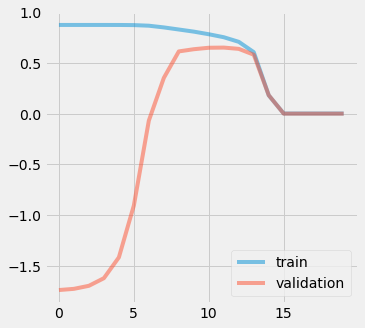

In [185]:
plt.plot(train_scores,alpha=.5,label='train')
plt.plot(val_scores,alpha=.5,label='validation')
plt.legend();
plt.d

In [186]:
alpha_list[np.argmax(val_scores)]

4.281332398719396

In [201]:
train_scores=[]
val_scores=[]
for a in alpha_list:
    # update alpha value! 
    clf = linear_model.Ridge(alpha=a)
    clf.fit(X_train_std,y_train)
    train_scores.append(clf.score(X_train_std,y_train))
    val_scores.append(clf.score(X_val_std,y_val))

In [200]:
alpha_list=np.logspace(-2,8,50)
alpha_list

array([1.00000000e-02, 1.59985872e-02, 2.55954792e-02, 4.09491506e-02,
       6.55128557e-02, 1.04811313e-01, 1.67683294e-01, 2.68269580e-01,
       4.29193426e-01, 6.86648845e-01, 1.09854114e+00, 1.75751062e+00,
       2.81176870e+00, 4.49843267e+00, 7.19685673e+00, 1.15139540e+01,
       1.84206997e+01, 2.94705170e+01, 4.71486636e+01, 7.54312006e+01,
       1.20679264e+02, 1.93069773e+02, 3.08884360e+02, 4.94171336e+02,
       7.90604321e+02, 1.26485522e+03, 2.02358965e+03, 3.23745754e+03,
       5.17947468e+03, 8.28642773e+03, 1.32571137e+04, 2.12095089e+04,
       3.39322177e+04, 5.42867544e+04, 8.68511374e+04, 1.38949549e+05,
       2.22299648e+05, 3.55648031e+05, 5.68986603e+05, 9.10298178e+05,
       1.45634848e+06, 2.32995181e+06, 3.72759372e+06, 5.96362332e+06,
       9.54095476e+06, 1.52641797e+07, 2.44205309e+07, 3.90693994e+07,
       6.25055193e+07, 1.00000000e+08])

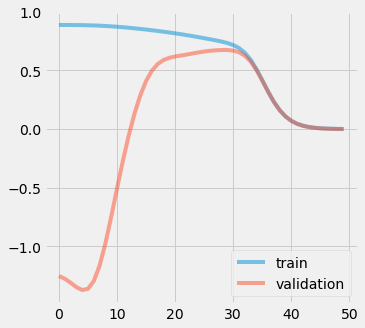

In [202]:
plt.plot(train_scores,alpha=.5,label='train')
plt.plot(val_scores,alpha=.5,label='validation')
plt.legend();

In [203]:
print(max(val_scores))


0.6743105965007159

In [ ]:
# Create the final model .. 




## What have we done?
- Learned how to use statsmodels with R formula syntax for creating linear models
- Learned how to evaluate models using adjusted R^2
- Understood linear and polynomial regression in sklearn
- Used seaborn for visualizing relationships in data
- Used pandas for manipulating data as we move through our workflow
- Gotten a peak into a genuine data science workflow
- Seen how curiosity and creativity can yield big gains in a data science modeling pipeline



In [ ]:
archives 

df_impute['highway_fuel_economy']=df_impute[["highway_fuel_economy","engien"]].groupby("bedrooms").transform(lambda x: x.fillna(x.median()))